# 1. Load libraries and datasets.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('inputs/Train.csv')
test = pd.read_csv('inputs/Test.csv')

In [5]:
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


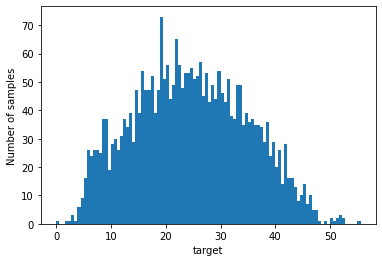

In [6]:
plt.hist(train['target'].values, bins = 100)
plt.xlabel('target')
plt.ylabel('Number of samples')
plt.show()

In [7]:
train[['lat', 'lon']].describe()

,lat,lon
count,2822.000000,2822.000000
mean,-26.880740,28.666515
std,2.021279,2.373809
min,-32.490089,16.760022
25%,-28.569019,27.707932
50%,-26.549866,28.959679
75%,-25.572130,30.441505
max,-22.331267,32.858249


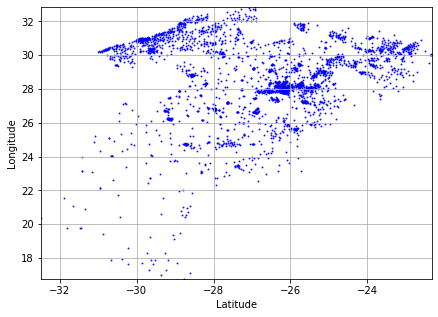

In [8]:
lon_border = (16.760022, 32.858249)
lat_border = (-32.490089, -22.331267)

plt.figure(figsize = (7, 5))
plt.scatter(train['lat'].values, train['lon'].values, color = 'blue', s = 1, label = 'train', alpha = 0.8)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(lat_border)
plt.ylim(lon_border)
plt.grid()
plt.show()

In [9]:
test[['lat', 'lon']].describe()

,lat,lon
count,1013.000000,1013.000000
mean,-32.690435,24.763302
std,1.217243,4.214377
min,-34.670197,17.917653
25%,-33.876457,19.471822
50%,-32.935001,26.544448
75%,-31.592410,28.542230
max,-30.125381,30.162572


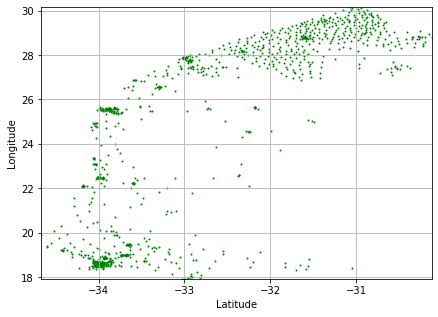

In [10]:
lon_border = (17.917653, 30.162572)
lat_border = (-34.670197, -30.125381)

plt.figure(figsize = (7, 5))
plt.scatter(test['lat'].values, test['lon'].values, color = 'green', s = 1, label = 'test', alpha = 1)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(lat_border)
plt.ylim(lon_border)
plt.grid()
plt.show()

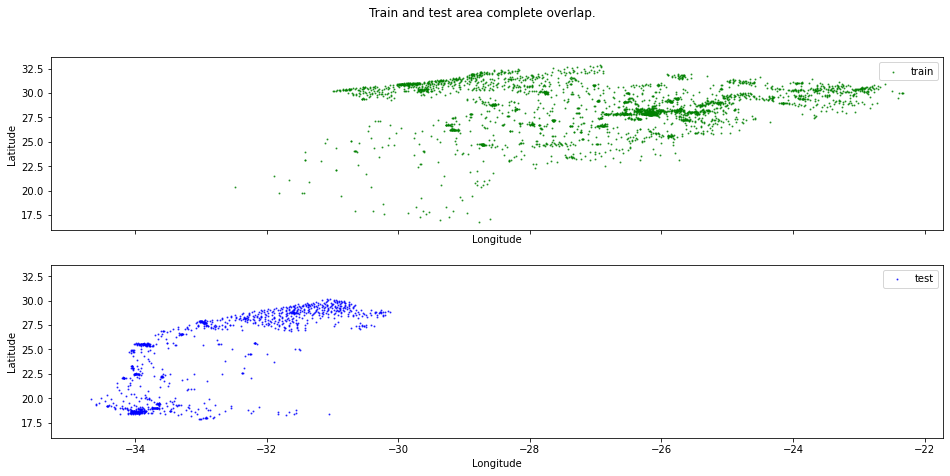

In [11]:
lon_border = (18, 33)
lat_border = (-35, -22)
plt.rcParams['figure.figsize'] = [16, 7]
fig, ax = plt.subplots(ncols = 1, nrows = 2, sharex = True, sharey = True)
ax[0].scatter(train['lat'].values, train['lon'].values, color = 'green', s = 1, label = 'train', alpha = 0.7)
ax[1].scatter(test['lat'].values, test['lon'].values, color = 'blue', s = 1, label = 'test', alpha = 0.7)
fig.suptitle('Train and test area complete overlap.')

ax[0].legend(loc = 0)
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

ax[1].legend(loc = 0)
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
plt.show()

## 2. Feature extraction(PCA)

In [34]:
coords = np.vstack((train[['lat', 'lon']].values,
                    test[['lat', 'lon']].values))
coords

array([[-29.68227006,  24.73474333],
       [-29.11931138,  24.75773731],
       [-29.14227614,  25.09409343],
       ...,
       [-34.06270389,  18.76745656],
       [-34.05777194,  18.48789348],
       [-33.85050288,  18.72196062]])

In [35]:
pca = PCA()
pca.fit(coords)

PCA()

In [36]:
train['pca0'] = pca.transform(train[['lat', 'lon']])[:, 1]
train['pca1'] = pca.transform(train[['lat', 'lon']])[:, 0]

test['pca0'] = pca.transform(test[['lat', 'lon']])[:, 0]
test['pca1'] = pca.transform(test[['lat', 'lon']])[:, 1]

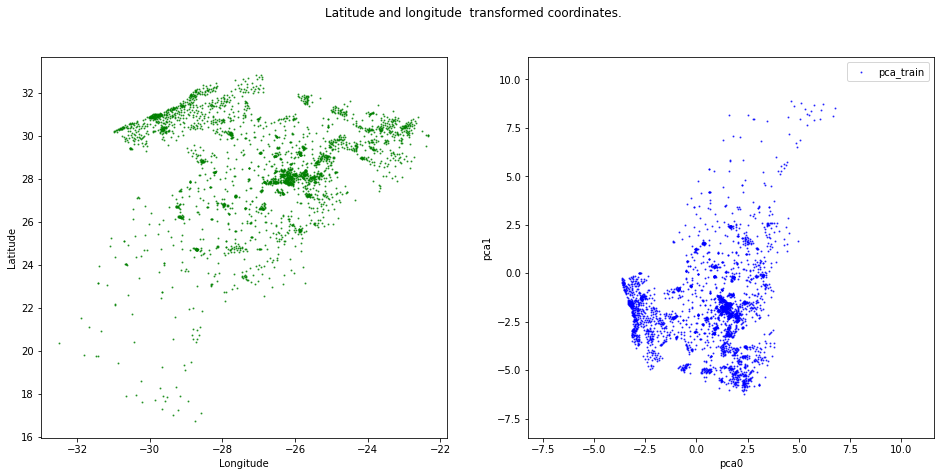

In [39]:
fig, ax = plt.subplots(ncols = 2)

ax[0].scatter(train['lat'].values, train['lon'].values, color = 'green', s = 1, label = 'train', alpha = 0.7)
ax[1].scatter(train['pca0'].values, train['pca1'].values, color = 'blue', s = 1, label = 'pca_train', alpha = 0.7)
fig.suptitle('Latitude and longitude  transformed coordinates.')


ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

ax[1].legend(loc = 0)
ax[1].set_xlabel('pca0')
ax[1].set_ylabel('pca1')
pca_borders = pca.transform([[x, y] for x in lat_border for y in lon_border])
ax[1].set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())
ax[1].set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())
plt.show()

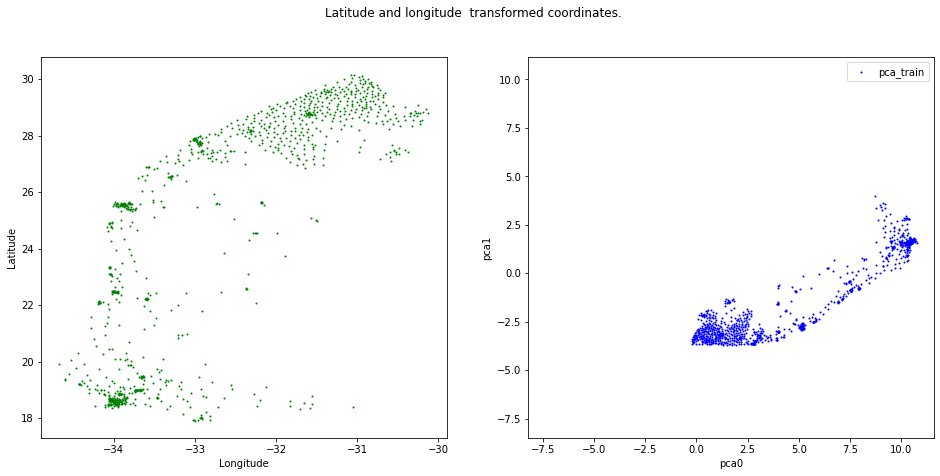

In [21]:
fig, ax = plt.subplots(ncols = 2)

ax[0].scatter(test['lat'].values, test['lon'].values, color = 'green', s = 1, label = 'test', alpha = 1)
ax[1].scatter(test['pca0'].values, test['pca1'].values, color = 'blue', s = 1, label = 'pca_train', alpha = 1)
fig.suptitle('Latitude and longitude  transformed coordinates.')


ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

ax[1].legend(loc = 0)
ax[1].set_xlabel('pca0')
ax[1].set_ylabel('pca1')
pca_borders = pca.transform([[x, y] for x in lat_border for y in lon_border])
ax[1].set_xlim(pca_borders[:, 0].min(), pca_borders[:, 0].max())
ax[1].set_ylim(pca_borders[:, 1].min(), pca_borders[:, 1].max())
plt.show()